In [12]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [4]:
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [127]:
x,y=training_data[1]
x.shape, y

(torch.Size([1, 28, 28]), 0)

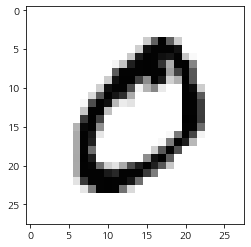

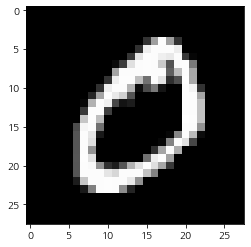

In [131]:
sample=np.array(x.permute(1,2,0))
img=sample.copy()
img = 1 - img
plt.imshow(img, cmap='gray')
plt.show()
plt.imshow(sample, cmap='gray')
plt.show()

In [27]:
image=np.array(x.permute(1,2,0))
image=(image*255).astype(np.uint8)
image

array([[[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0]],

       [[  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
        [  0],
      

## 방법
- np 변환(float32)
- image=(image*255).astype(np.uint8)
- edge detection
- edge/255.astype(np.float32)

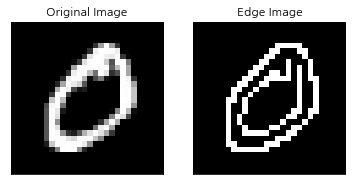

In [144]:
image=np.array(x.permute(1,2,0))
image=(image*255).astype(np.uint8)
edges = cv2.Canny(image,50,150)
plt.subplot(121),plt.imshow(image,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [77]:
image.shape

(28, 28, 1)

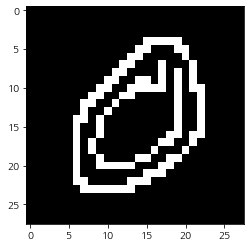

In [46]:
e1=(edges/255).astype(np.float32)
plt.imshow(e1, cmap='gray')

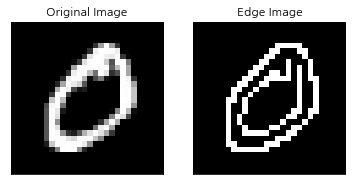

In [39]:
image2=np.array(x.permute(1,2,0))
image2=(image2*100)
edges2 = cv2.Canny(image,50,150)
plt.subplot(121),plt.imshow(image2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges2,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

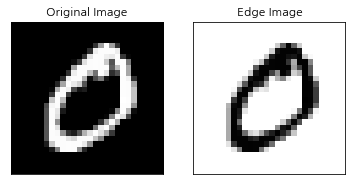

In [135]:
image2=np.array(x.permute(1,2,0))
#image2=(image2*100)
image3 = 1-image2
plt.subplot(121),plt.imshow(image2,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(image3,cmap = 'gray')
plt.title('Contrav Image'), plt.xticks([]), plt.yticks([])
plt.show()

In [40]:
edges2

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0, 255, 255, 255, 255, 255,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 255, 255,   0,   0,   0, 255, 255,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [76]:
e1.shape

(28, 28)

In [145]:
#transform class 정의(call 하면 호츨 )
class CannyEdge(torch.nn.Module):
    def __init__(self):
        super().__init__()
    
    def forward(self,img):
        img=np.array(img.permute(1,2,0))
        img=(img*255).astype(np.uint8)
        edges = cv2.Canny(img,50,150)
        edges=(edges/255).astype(np.float32)
        #torch.tensor(edges).unsqueeze(0)
        return edges
    
    def __call__(self, sample):
        return self.forward(sample)

In [146]:
from torchvision import transforms
data_transform = transforms.Compose([CannyEdge(),ToTensor()])
data_transform


Compose(
    CannyEdge()
    ToTensor()
)

In [147]:
CannyEdge()

CannyEdge()

In [148]:
torch.tensor(e1).unsqueeze(0).shape

torch.Size([1, 28, 28])

In [92]:
#transform class 정의(call 하면 호츨 )
class CannyEdgeTest:
    def __init__(self):
        pass
        #super().__init__()
    
    def forward(self,img):
        img=np.array(img.permute(1,2,0))
        img=(img*255).astype(np.uint8)
        edges = cv2.Canny(img,50,150)
        edges=(edges/255).astype(np.float32)
        #torch.tensor(edges).unsqueeze(0)
        return edges
    
    def __call__(self, sample):
        return self.forward(sample)

In [151]:
tr=transforms.Compose([CannyEdgeTest(), ToTensor()])
tr(test_data[1][0]).shape

torch.Size([1, 28, 28])

In [115]:
class CustomDataset(Dataset):

    def __init__(self,dataset, transform=None):
  
        self.dataset=dataset
        self.transform = transform

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        
        img,y=self.dataset[idx]

        if self.transform:
            img = self.transform(img)

        return img,y

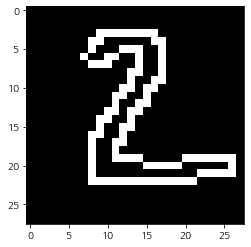

In [121]:
trset=CustomDataset(test_data,tr)
x,y=trset[1]
plt.imshow(x.permute(1,2,0), cmap='gray')

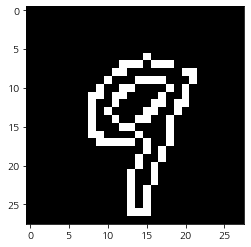

In [120]:
x,y=trset[12]
plt.imshow(x.permute(1,2,0), cmap='gray')